In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.base import clone 
from sklearn import tree
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pylab as plt 
%matplotlib inline 
from summarytools import dfSummary
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import LabelEncoder

**GitHub**: https://github.com/Ofleitman/ML2_Final

**Kaggle Dataset**: https://www.kaggle.com/datasets/vetrirah/customer/data

**Kaggle Dataset Title**: *Customer Segmentation*

Analytics Vidhya. (n.d.). JanataHack customer segmentation: Problem statement. Analytics Vidhya. https://www.analyticsvidhya.com/datahack/contest/janatahack-customer-segmentation/#ProblemStatement

## Machine Learning 2: Unsupervised Learning Final Project - Customer Segmentation

### Step 1: Gather data, determine the method of data collection and provenance
### Step 2: Identify an Unsupervised Learning Problem

In marketing, segmenting customers appropriately is essential to ensure your advertising dollars spent go a long way. I have chosen a dataset that was part of a Hackathon from Analytics Veidhya. The dataset allows you to practice segmenting customers across 4 different segments based on specific features. Although the training set has the labels included, I will treat this as unsupervised learning exercise and produce models **using unsupervised learning / algorithms**. I will then compare my results to supervised learning methods and compare the results to one another. The **type of task** is to produce an accurate and efficient model that would help with segementing customers appropriately so that a company can make the most of their advertising budeget. The **motivation** behind this work is to find ways to stretch a companies advertising budget to increase the companies profits.

### Data

**Reference**<br>
As noted earlier, the **dataset was collected from Kaggle**. However, the **provenance of the data is Analytics Vidhya**. There is no additional information on **how the data was obtained**. I suspect this is data that was created for the purposes of a learning opportunity.

APA Citation:
<br>
Analytics Vidhya. (n.d.). JanataHack customer segmentation: Problem statement. Analytics Vidhya. https://www.analyticsvidhya.com/datahack/contest/janatahack-customer-segmentation/#ProblemStatement

**Data Description**<br>
- Format: **tabulated data**<br>
- Training Data size: **8068 samples**<br>
- Feature size: 9 features, 1 target variable (Segmentation), and 1 ID column<br>
- Features: ID column will be dropped as it will not add value to segmenting customers

**Description of Features**

Outlined below is the list of variables included in the raw data. Excluding the ID column, there are 9 features followed by the Segmentation, target variable. I will remove ID and Segmentation for the purposes of our unsupervised learning techniques. I will then later produce a few models with supervised learning to compare the performance against each other. The reason unsupervised learning approach is important, many times, we may not know who our customers are. We would need to segment customers based on available data to be able to make an effective data-driven marketing campaign.

|Index|Feature Name    |Description|
|:-   |:-|:-|
|0    |ID               |Customer ID       
|1    |Gender           |Gender of customer
|2    |Ever_Married     |Customer marital status     
|3    |Age              |Customer age
|4    |Graduated        |Whether customer graduated
|5    |Profession       |Customer profession
|6    |Work_Experience  |Customer work experience in years
|7    |Spending_Score   |Customer spending score
|8    |Family Size      |Number of family member a customer has (includes customer themselves)
|9    |Var_1            |Anonymized category for the customer
|10   |Segmentation     |Customer segment (target variable)

In [2]:
# load data
df_train, df_test, df_sample = pd.read_csv("data/Train.csv"), pd.read_csv("data/Test.csv"), pd.read_csv("data/sample_submission.csv")

In [3]:
# print first 5 rows to get a sense of the data structure
df_train.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
# print first 5 rows to get a sense of the data structure
df_test.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [6]:
# below is just a reference of how data was submitted ot hackathon to compete, 
# we won't be using this data as we cannot submit it since the hackathon is over
df_sample.head(5)

,ID,Segmentation
0,458989,A
1,458994,A
2,458996,A
3,459000,A
4,459001,A


### Step 3: Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data

### Data Cleaning

**How and why I cleaned the data**: <br>
Before I can do exploratory data analysis (EDA), I must first ensure our data is clean and ready to be analyzed. As a first step, I explored whether there are any values that contian **blanks or null values**. It turns out gender, graduated, profession, work_experience, family_size, and Var_1 all have missing values. The number of missing values is relatively small (in the hundreds) compared to the sample training size we have which is in the thousands. Therefore, I will remove the entire rows of each of these missing features rather than estimating or interpreting them to maintain such rows. These missing values along with the ID column will create noise in our EDA step and issues when we get to creating our models. Therefore, we will **drop ID column** completely as it does not add value in our segmentation exercise and remove rows containing missing values from the aforementioned features. We will also **drop this feature**.
<br><br>
Additionally, I noticed several features are objects. They need to be encoded to be used in the models. Thus, I have encoded each of the features that appeared to be objects and encoded them appropriately ahead of EDA step.
<br><br>
**Conclusions / discussions**: <br>
In summary, I removed the id column as it does not add value to predicting whether a customer should belong to a specific segment. I have also removed all rows that have missing data. Additionally, I have actioned data type **munging** on the target variable (e.g., "Segmentation") to ensure it is integer and not string. Previously, the data type was object for this variable. I have also encoded the features that were object types into boolean form leveraging `get_dummies` function.
<br><br>
**Visualizations**: <br>
What follows is visualizations of the data followed by the specific cleaning steps exercised as discussed in the aforementioned sections. I visualized the data leveraging a helpful function called `dfSummary` to check for null values before removing them. Once removed, I checked to ensure it was properly removed. Further, I checked the data types and ensured the object target variable was appropriately converted to integer so we can compare the results easier. Additionally, I visualized the data for imbalances by creating a countplot via seaborn library to illustrate that the data is relatively balanced visually and also included the counts above the chart as reference. The outliers were visually reviewed via a pairplot through the seaborn library. Lastly, I noticed in the data step, when I printed the head of the data the features would likely not need to be normalized amongst each other as they are similar in terms of their ranges.

In [7]:
# make a copy of the df in case we need to revert back
df_clean = df_train.copy()
# check for unique values to ensure only 2 variables within column
print(f"Unique values for diagnosis column: {df_clean['Segmentation'].unique()}\n")
# re-map each variable to 1 - malignent and 0 - benign
df_clean['Segmentation'] = df_clean['Segmentation'].map({'A': 1, 'B': 2, 'C': 3, 'D' : 4})
print(f"First 5 columns: {df_clean['Segmentation'].head(5)}\n")
print(f"Last 5 columns: {df_clean['Segmentation'].tail(5)}")

Unique values for diagnosis column: ['D' 'A' 'B' 'C']

First 5 columns: 0    4
1    1
2    2
3    2
4    1
Name: Segmentation, dtype: int64

Last 5 columns: 8063    4
8064    4
8065    4
8066    2
8067    2
Name: Segmentation, dtype: int64


In [8]:
# summarize all the columns and get a sense of their distribution via mini historgrams
dfSummary(df_clean)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID[int64],Mean (sd) : 463479.2 (2595.4)min < med < max:458982.0 < 463472.5 < 467974.0IQR (CV) : 4503.5 (178.6),"8,068 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACr0lEQVR4nO3YvW/aQBjH8ecgCRegtngp2Vg6RuqAlIWlW8b+sV27BYlInTN06ZQlioSIEW4QjqFD0qkqcDYp+anfz5wnPt99MS9uvV4b8NZVDr0AYBdHh17AJs65UzM7KTi+XK/Xj/tcz65U1/2WbQ31UJvunDvtdDqfoyhqFZl/eHiYO+e+mtmiyLw9v9usCsz5drt9Gcdxo8hFZ7PZ1Dn3pcy+WfHzKnrP+5jf2MrGUMvGUnLTT6Ioag2Hw8c4joNiu7u7e3d9ff2p3+93q9VqcKh5nh+nafqh2Wz+qFQqWchslmXezM4vLi6+dbvdWchskiR+PB63JpPJiZkF71mZ8ypzz/uY39bKtidq4ViSJPGj0ag3mUy6zrmgA3sRrVar4ziOp71e72fI4HQ6PfXe1weDweLs7GwaeuHb29vWzc3N+8Fg8D10/mW27r3PQtdtZpbneWRmkXMudNTMLGo2m73hcDgLPa8y91x2fpcX6E6fUeM4XoRuepqmx1mWfez3+9UiT7Usy3ye5+eLxeLKzIIP3Mys0WgEr9vsOfSi879ni9jXntVqtaui6z7Enr3YuG+v9mVquVwe7eGpVn96eqq+xvreIvbs7179W3/ZV+j/iD37E7+jQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQsLRLn+UJIkP/cfz+dybmaVp6u/v7+v/cl712qrrLju/S1+/AN8TZLtKM6GDAAAAAElFTkSuQmCC"">",0(0.0%)
2,Gender[object],1. Male2. Female,"4,417 (54.7%)3,651 (45.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABO0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa9CETNRBJy1YM/nJuPes4GMuhgQ/V0oxQMGZ2d3Mbr0PuZhXKeXR+4iz8eM4foQQht6HXEnOeXXOfRLcXz6EMMzz/IgxPnsfcwXbtr2nlIZlWW5mRmy/eDOzGONzmqav3sdcyL33AWf01vsA/B/EBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIeLOfD/56H3IVPMs6n3NeU0qD8cFfMznn1cxeve84GwYvx2DwssMx5YMKb7Y63k6NMeWrYI7XHlO+HczxjsGUr45f543xpy5kiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskGHKt4PncQymfBXM8dpj8FLH4KWxbwpbat/D6U2YAAAAAElFTkSuQmCC"">",0(0.0%)
3,Ever_Married[object],1. Yes2. No3. nan,"4,643 (57.5%)3,285 (40.7%)140 (1.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABm0lEQVR4nO3bQWrCUBRG4RsJUicJQXAxWUQX20VkN0F8gypO0kFtazvPeSX3fDNnTzkoT/I3y7KERNjVPoDyaCLiEBH72gfZuPuyLNfah6itPR6Pr13XDbUPsmWllHPTNG/Zg2u7rhvGcbz2fX+rfZgtulwuL9M0DfM87yMid2wREX3f306n03vtw2zYofYB/gMvCMIYmzDGJoyxCWNswhibMMYmjLEJY2zCGJswxiaMsQljbMIYmzBtxOczV7UPslV+tj/aUsp5mqYhfOZqNaWUc0Tca5+jNjcIDDcIEdE45RMl+zeb3zig1OsqV0+stOsqV0+87Osqb+Ag/9QVxtiEMTZhjE0YYxPG2IQxNmGMTRhjE8bYhDE2YYxNGGMTxtiESbuuyviea0u9rnL1xHKD4CPhGNdVwnhBEObvz6g/K1rNrymf0zatafc15RvH8fqILutlQSv7nvI9Xqf7+0McLwjCGJswxiaMsQljbMIYmzDGJoyxCWNswhibMMYmjLEJY2zCGJswaad84j1P+Zy2aVVuEIRxyifMB+Neluse89fbAAAAAElFTkSuQmCC"">",140(1.7%)
4,Age[int64],Mean (sd) : 43.5 (16.7)min < med < max:18.0 < 40.0 < 89.0IQR (CV) : 23.0 (2.6),67 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACr0lEQVR4nO3dT27aQBSA8TclgPkjI0QFOy5QqQuWPkQP2yMEiRPkBuyQLGSEGwtj3BWVqqYBZux03vT77U29+OR43shTU9e1AL779K9vALjHU5s/bowZiEjP4SdOdV2/NnU/0Ku1UI0xg9ls9i2O46ntbxwOh70x5juxos0nai+O42mSJK+TyaR49OIsy6LNZjNN07QnIoT6n2v1T7+IyGQyKebz+Q/LyweN3gzUYjEFFVp/orqoqqorIrExxuZyFmIB8TbUPM+7ZVl+XS6XnU6n8/A7LguxsHgb6ul0eoqiaLharYrFYrF/5FoWYuHxNtSr0WhkuxhjIRYQFlNQgVChAqFCBe/fUW05jrZEGG95JchQXUdbIoy3fBNkqC6jLRHGWz4KMtQrh9GWVFUVC7ti3gg6VFvsivmHUN/Arph/CPUd7Ir5gzkqVCBUqECoUOHmO6rDl6Tx5XLpWlwH/OHdUF2+JC3LMqqq6ktRFM8iYvvNFCAit5+o1l+Sbrfb6cvLy/B8Pncc7g8QkTvHUzZfku73e0Y0aAyLKahAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKvC5dAv4vweaR6gN45SVdhBqwzhlpR2E2hJOWWkWiymowBPVM5yU/TZC9QgnZf8doXqkiZOy1+v1PE3Tz8aYg80t+Bo4oXrIdiEW8miMUAMS8m

### Dropping all NaN values

In [9]:
# drop missing values
df_clean = df_clean.dropna()
dfSummary(df_clean)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID[int64],Mean (sd) : 463519.8 (2566.4)min < med < max:458982.0 < 463575.0 < 467974.0IQR (CV) : 4392.0 (180.6),"6,665 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACxUlEQVR4nO3asW7aUBSH8XMhBJMgWwgVNpaOlTow8hB92D5ChjxBhi6d2JCQBcINwrHpUqRUqgjci2v/4fvNdWxZn+45RnX7/d6ApmvV/QDAKe7qfoBr5Jzrmdm95+W7/X7/esnnuQZXG2pgLGaewTjnesPh8FscxwOfm67X69Q5951Y/3aVoYbGYhYUzH0cx4PZbPaaJMn2nAtXq1X0/Pw8WC6X92ZGqO80OtSAUzHu9/uj2Wy2PjcWs8sEkyTJdjQa/fK4tOdzv4PASdIyszLg9pWtLY0NNeRUzPM8KoriS7fbffKMxSwwmDqEvLOiKDpZln3u9/s/W61W7nP/KteWxoZqASN0Pp8PXl5eHt7e3tpVPVxViqLomFnsnPO53HuS/Hlnn6bT6Y/xeJyee+Oq15ZKQw0cQ3FZlp0kSdJzT8U0TeVOQzOzLMs6eZ5/nUwm7Xa7ffbKEjJJDu/s8fHRd2Uxq3AKVRZq6AfN4aVvt9snM/N9cVJ2u91dFEUP0+l063Oq1T1JAqfB0f22yhPVe3Sb1f/S6+R7qtU5SUKnwUf7beU7qu/Xb93jO+B0iMuy7FTwSI0WMg1O2W+b/DFVm5DT4RZXlvcCdtyjBxOh/kPI6XDLK0uVPgw15Ed39RHoczrUvbJcq6OhXuJH91sdgbisj07Um/zRHc1z0o7q8+XOCMQl8R+nIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIeHulH+0Wq2ic//wZrOJzMyyLIsWi8XD/7xe9d6qzx16/Sl9/QaUW4/oldU9BQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Gender[object],1. Male2. Female,"3,677 (55.2%)2,988 (44.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOklEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa9CETJRBCgWjYfRk3HtW8DEXQ4KfK6UYoODM7Gpml96HnNCjlHLrfcSR+HEcv0IIQ+9DzibnvDrnvgnujw8hDPM832KM997HnMW2bZ8ppWFZlouZEdsvb2YWY7xP0/TT+5iTufY+4Gg+eh+A/4PYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZb/b62K/3IWfC86zzOec1pTQYH/u9Vc55NbNH7zuOhMFLOwxedhxTPqjwZqvjrdQAU74KZnhtMOXbYYbXDlO+On6ZN8CfupAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhinfDs+iHaZ8Fczw2mDwUsfgpYEnCltq37tbH3oAAAAASUVORK5CYII="">",0(0.0%)
3,Ever_Married[object],1. Yes2. No,"3,944 (59.2%)2,721 (40.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABM0lEQVR4nO3bwWnDQBRF0T9BmHgzgxC4GBWRYlPEdCOEZhEbbyaL9PA+5N1Twbe5CGz0ypwzAIUSEfeIuGUfYuQ953xmH5Fh2bbtq9a6Zh/iYoxxllK+HYNbaq3rvu/P1tor+5j/7rquz977ehzHLSL8YouIaK29Ho/HT/YxJu7ZB2T5yD4APogNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJBZIv5e6ss+xIH797yMMc7e+xrGL/UpjTHOiHhn35GBwYue7eClMOWDivuTzfYpk8F6yuc8q8tgO+Vzn9VlcJ/y8QtciD91IUNskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoOM7ZTP8TNns57yOc/qMjB4YX8g8wsKW2rfwuH0SAAAAABJRU5ErkJggg=="">",0(0.0%)
4,Age[int64],Mean (sd) : 43.5 (16.5)min < med < max:18.0 < 41.0 < 89.0IQR (CV) : 22.0 (2.6),67 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtUlEQVR4nO3dzaraQBiA4W/qUUaFBH/QnTdwoAvBjRfQZS+2l1DBRdfegTtBRDE9wfjTlYVSe9SZpJ1v+j77iVm8aPINieZyuQgQug//+gSAR7xUeXBjTFNEGh6HOFwul7eyzgd6VRaqMabZ6/U+J0nScT3GbrfbGGO+ECuq/EZtJEnSmU6nb2ma5s8u3m63dj6fd9brdUNECPU/V+lPv4hImqb5YDD47ri8WerJQK3KQ/VxOp3qIpIYY1yWc30bkWBDzbKsXhTFx9FoVKvVak9fOnB9G5dgQz0cDi/W2tZ4PM6Hw+HmmbVc38Yn2FCv2u226zUu17cRYeAPFQgVKgT/0+/Kc2IgwtQgKFGG6jsxEGFqEJooQ/WZGIgwNQhRlKFeeUwMRJgaBCXqUH2wKxYWQr2BXbHwEOoN7IqFh1Dfwa5YOBj4QwVChQqEChUIFSoQKlS4e9fv8chzcj6f6w7rgN+8G6rPI89FUdjT6fSa5/lXEXHdxgRE5P43qvMjz8vlsrNYLFrH47HmcX6AiDw48Hd55Hmz2TD0Rmm4mYIKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIHn+ivA64DKR6gl43VA1SDUkvE6oGoQakV4HVC5uJmCCnyjBob/HriNUAPCfw/8GaEGpIz/HpjNZoP1et03xuxcTiHUwAk1QK43YjGPxgg1IjGPxgg1QjGOxhhPQQVChQqEChUIFSpwM4XSeLz0WeTODJdQ8ZPn9q3tdruf0jRtuyy+N8MlVIiI/2ZBURRWRF4nk8m3fr//1K7YIzNcQoWI+G/fXt8wbq0tqpjh

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6665 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 624.8+ KB


### Data Encoding
To encode the variables I leveraged `get_dummies` for the variables that were object types. This created new features in boolean form. This means `True` or `False`. The way to interpret this would be if Gender_Male is `True` then the customer is a "Male", however, if it is `False` the customer is a 'Female'. After which, I converted the dummies into integers 0 - False, 1 - True as a preprocessing step for model step.

In [11]:
df_encoded = pd.get_dummies(df_clean, columns=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1'], drop_first=True)
df_encoded = df_encoded.drop(columns=['ID'])
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6665 entries, 0 to 8067
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       6665 non-null   int64  
 1   Work_Experience           6665 non-null   float64
 2   Family_Size               6665 non-null   float64
 3   Segmentation              6665 non-null   int64  
 4   Gender_Male               6665 non-null   bool   
 5   Ever_Married_Yes          6665 non-null   bool   
 6   Graduated_Yes             6665 non-null   bool   
 7   Profession_Doctor         6665 non-null   bool   
 8   Profession_Engineer       6665 non-null   bool   
 9   Profession_Entertainment  6665 non-null   bool   
 10  Profession_Executive      6665 non-null   bool   
 11  Profession_Healthcare     6665 non-null   bool   
 12  Profession_Homemaker      6665 non-null   bool   
 13  Profession_Lawyer         6665 non-null   bool   
 14  Profession_Ma

### Exploratory Data Analysis

**Feature description that make up the dataset**: <br>
I checked for **imbalances** within the target variable via countplot and **outliers** via boxplot for the features that were continuous in the dataset to better understand whether we need to be concerned about implementing techniques that are specific for imbalanced data or treatment of outliers. Turns out, the four segments in the trianing set is relatively balanced. Therefore, I won't worry about class imbalances. Equally important, I ran boxplots against continuous features within the data set to visually inspect for outliers. Looks like there are some for age, work experience, and family size. However, I decided to leave them in for now in case it helps explains the clusters or customer segmentation. Lastly, I ran countplots on boolean variables that I have encoded from the prior step to understand their distribution. At first glance, there are imbalances amongst these features, however, recall that these are boolean encoded. Therefore, they are actually relatively balanced. An easier way to see this is to run the historgram against profession on the unencoded dataset which I have done as well below. One thing to note is Artist profession is heavily represented over the other professions in the dataset.
<br><br>
**Description of correlations between different factors of the dataset**
There seems to be several moderately strong positive correlations between features of the dataset. For example, age seems to be moderately positively correlated amongst high spending score, lawyer profession, and married customers. Conversely, age seems to be moderately negatively correlated amongst lower spending score, healthcare profession, and family size. This can visually be seen by the heatmap I created from the seagate library. I considered moderately correlated items that were between .3 and .6. Those that have a negative sign would be considered negatively correlated while those with positive are postively correlated.
<br><br>
**Transformation requirements for data**
The boolean data is True or False. Therefore no scaling is required there. However, the 4 continuous features will require scaling before we jump into the model step. For example, age goes all the way up to over 90. If we don't normalize this, we may see poor model performance. The other 3 are not vastly out of range, but we will benefit from scaling them as well. Especially work experience.
<br><br>
**Hypothesis for data transformation**
Given most of our data is boolean I am leaning towards min-max scale. However, I would like to see the performance of sklearns built in `StandardScaler()` which leverages z-score normalization method.
<br><br>
**Outlier analysis**
As described in the feature description section, my data has several outliers in the continuous features including age, work experience, and family size. I also noticed the Artist profession seems to be dominating in sample size compared to the other professions in the dataset. We will maintain all outliers to see how models perform without removing them as they could help explain customer segmentation with the outliers intact. Other data cleaning techniques and approach was described in the aforementioned section in detail.
<br><br>
**Feature importance hypothesis**
Based on EDA I beleive profession, spend, age, gender and marital status would be important features in detemrining customer segmentation. My intuition leads me to beleive that a profession that pays more such as Executive and their spending habbits being higher than others will bucket this group together vs. those that spend less. Marital status may impact the customers sending habits as they likely have more folks to care for. Intuitively, age will group folks within their age group. They must have similar interest within a similar generation.

Counts: Segmentation
4    1757
3    1720
1    1616
2    1572
Name: count, dtype: int64


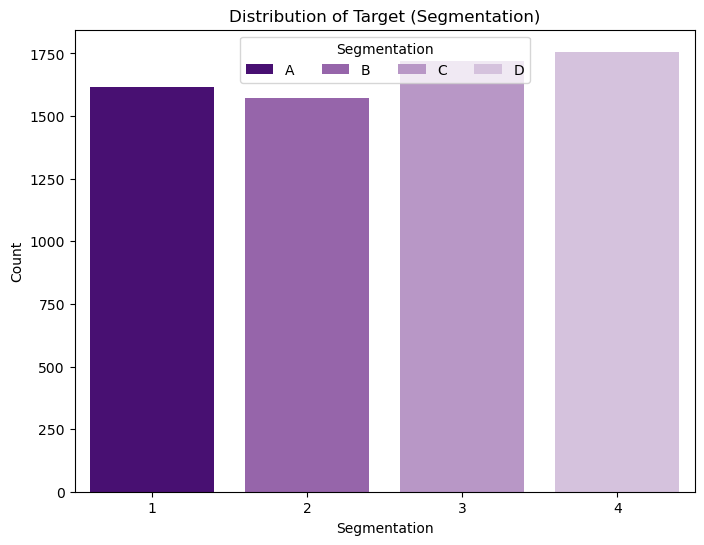

In [12]:
# check for data imbalance by counting how many 1s and 0s we have in the target variable
print(f"Counts: {df_clean['Segmentation'].value_counts()}")


# count plot
plt.figure(figsize=(8, 6))
custom_palette = ['#4B0082', '#9B59B6', '#BB8FCE', '#D7BDE2']
sns.countplot(x='Segmentation', data=df_clean, hue='Segmentation', palette=custom_palette)
plt.title('Distribution of Target (Segmentation)')
plt.xlabel('Segmentation')
plt.ylabel('Count')
plt.legend(title='Segmentation', labels=['A', 'B', 'C', 'D'], loc='upper center', ncol=4)
plt.xticks(rotation=0)
plt.show()

### Data Visualization of Features
Since a lot of my data is boolean form, boxplots don't make a lot of sense here as they are more suited for continuous data. I will create countplots for each of the features instead as shown below to get a sense of the distributions.

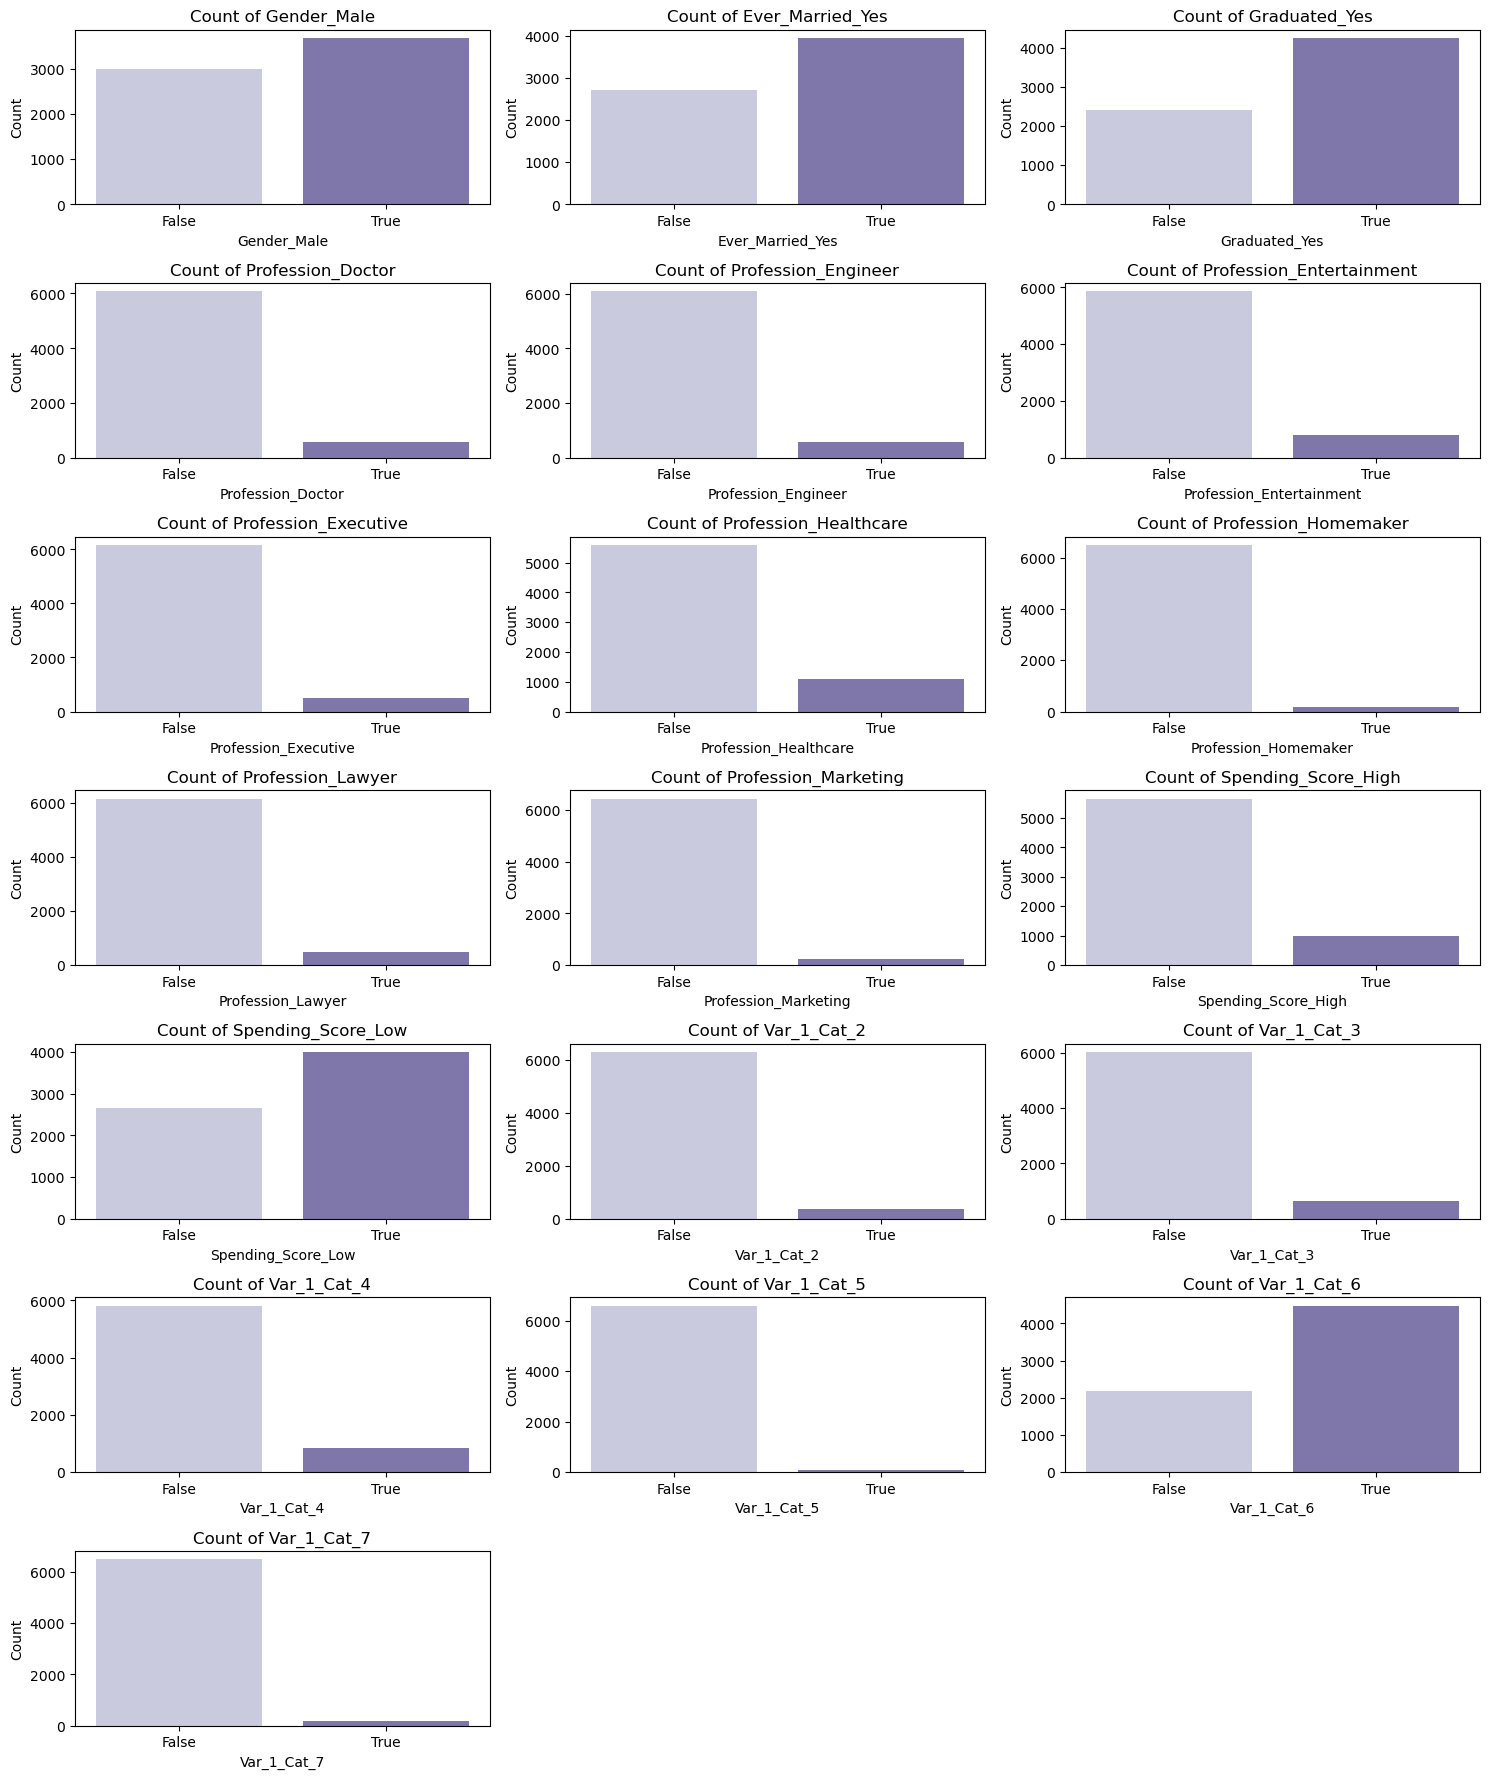

In [13]:
plt.figure(figsize=(15, 20))
# iterate through each feature and produce a countplot from df_encoded
for i, column in enumerate(df_encoded.select_dtypes(include=[bool]).columns):
    plt.subplot(((len(df_encoded.columns) // 3)+(len(df_encoded.columns) % 3 > 0)), 3, i + 1)  # Create subplots
    sns.countplot(x=df_encoded[column], palette='Purples', hue=df_encoded[column],legend=False)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks([0, 1], ['False', 'True'])  # Label the x-axis

plt.tight_layout()
plt.show()

To see profession on unencoded dataset to show relative balance amongst profession in the dataset, except Artist seems to be more prominent.

Counts: Profession
Artist           2192
Healthcare       1077
Entertainment     809
Doctor            592
Engineer          582
Executive         505
Lawyer            500
Marketing         233
Homemaker         175
Name: count, dtype: int64


/var/folders/q0/sr9dnrc94lz1bh9c76k66ndc0000gn/T/ipykernel_2989/3693523437.py:8: UserWarning: 
The palette list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Profession', data=df_clean, hue='Profession', palette=custom_palette)


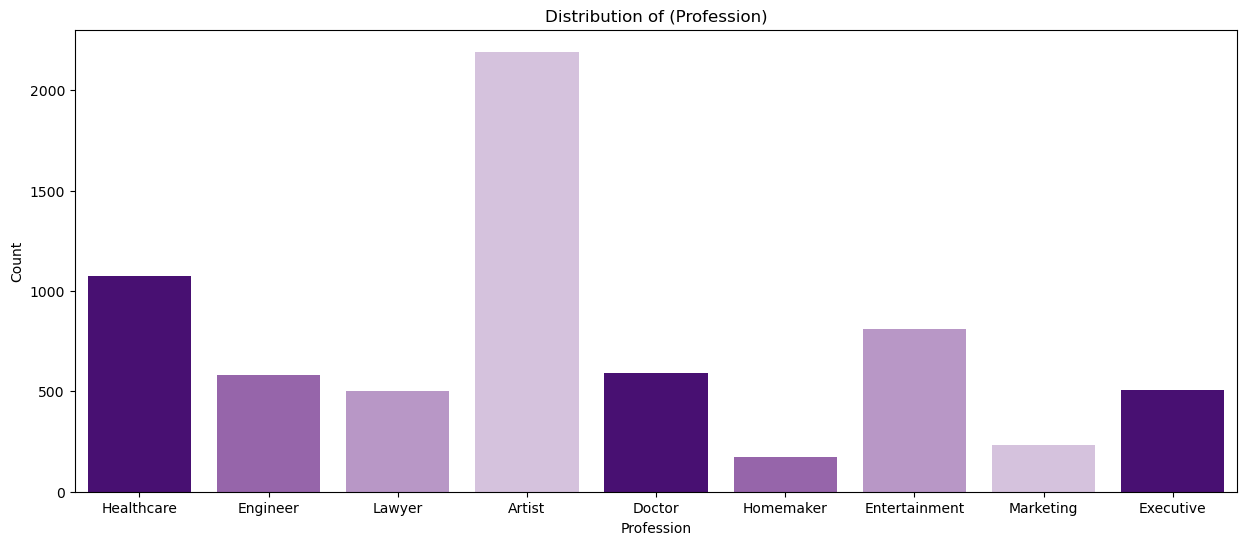

In [14]:
# check for data imbalance by counting how many 1s and 0s we have in the target variable
print(f"Counts: {df_clean['Profession'].value_counts()}")


# count plot
plt.figure(figsize=(15, 6))
custom_palette = ['#4B0082', '#9B59B6', '#BB8FCE', '#D7BDE2']
sns.countplot(x='Profession', data=df_clean, hue='Profession', palette=custom_palette)
plt.title('Distribution of (Profession)')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

For the features that are non-boolean types, I will produce a pairplot followed by box plots to get a sense of their distribution.

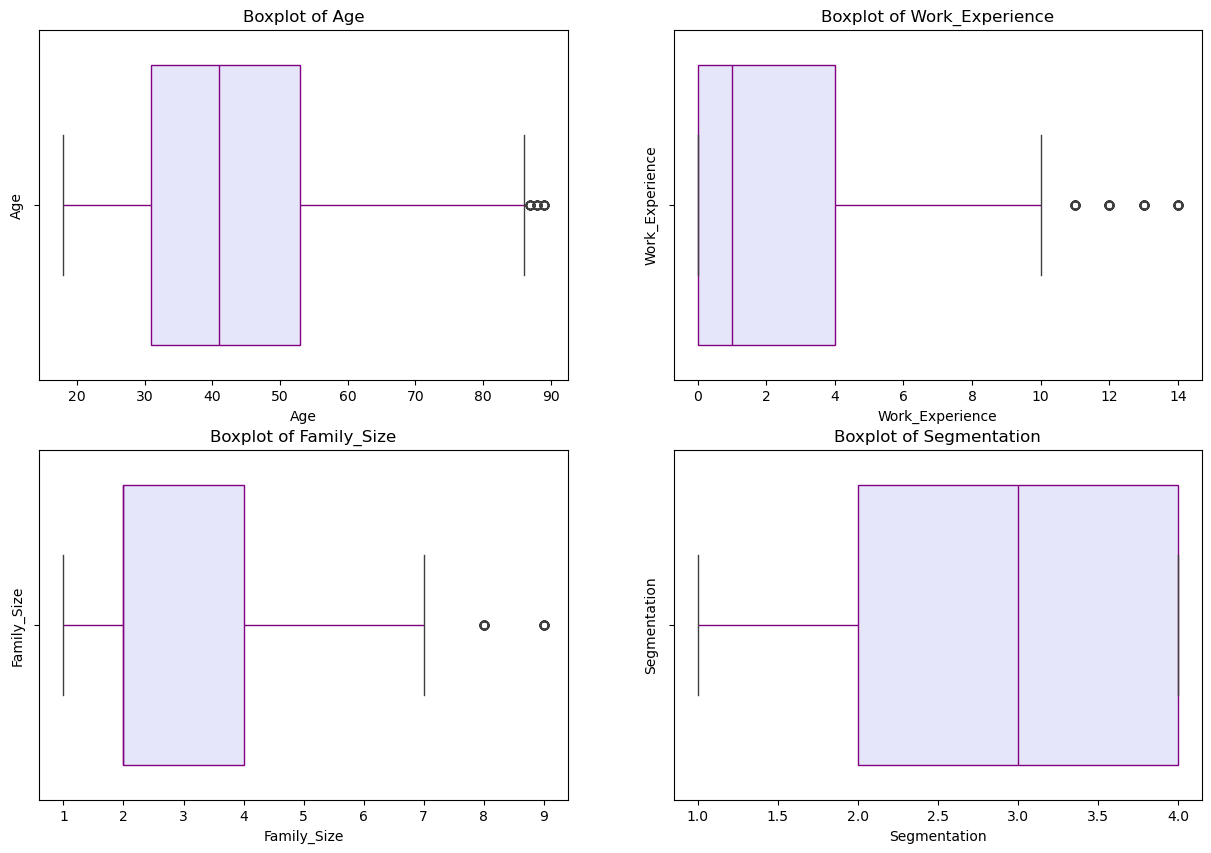

In [15]:
# create boxplots for numeric features - integer or floats
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_encoded.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(2, 2, i + 1)  # Create subplots
    sns.boxplot(x=df_encoded[column], whiskerprops=dict(color='purple'), boxprops=dict(facecolor='lavender', edgecolor='purple'), medianprops=dict(color='purple'))
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

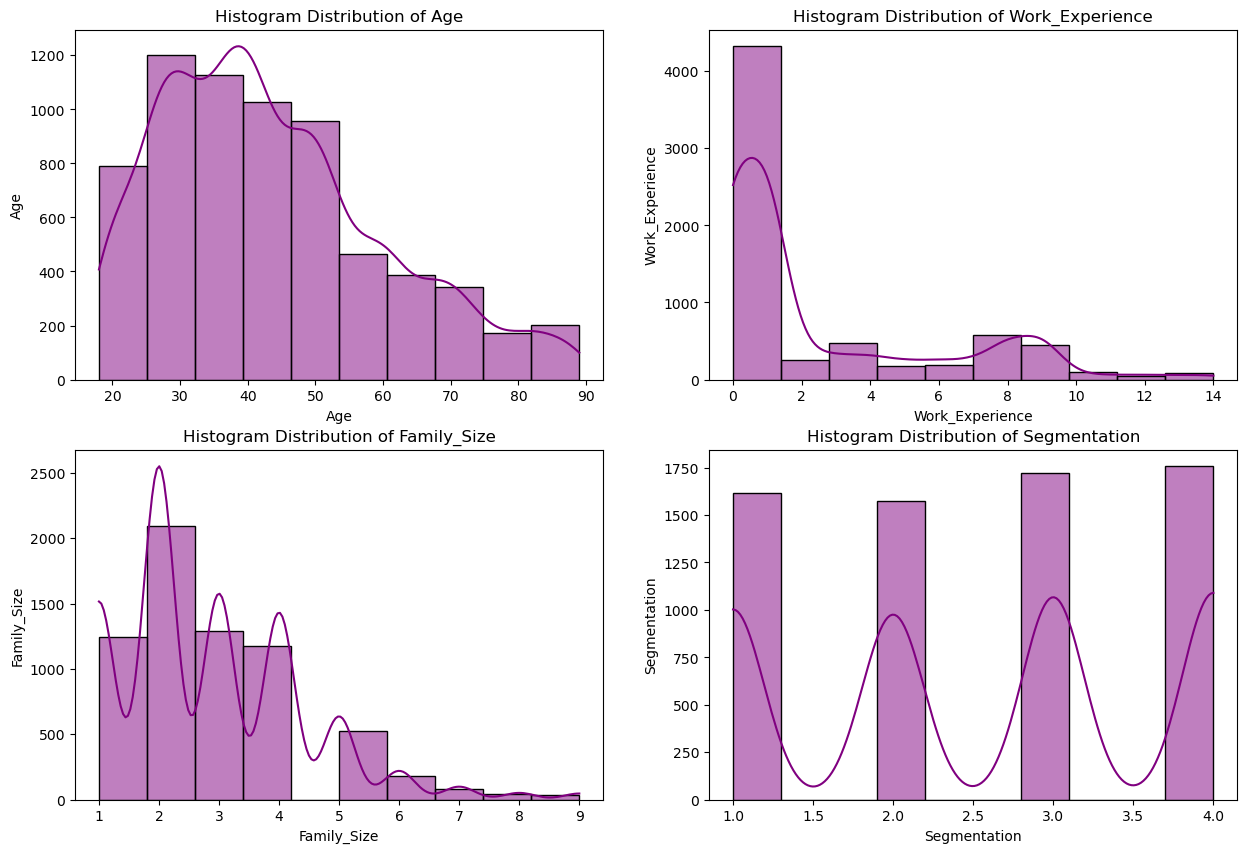

In [16]:
# create histplots for numeric features - integer or floats
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_encoded.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(2, 2, i + 1)  # Create subplots
    sns.histplot(x=df_encoded[column],bins=10, kde=True, color='Purple')
    plt.title(f'Histogram Distribution of {column}')
    plt.ylabel(column)

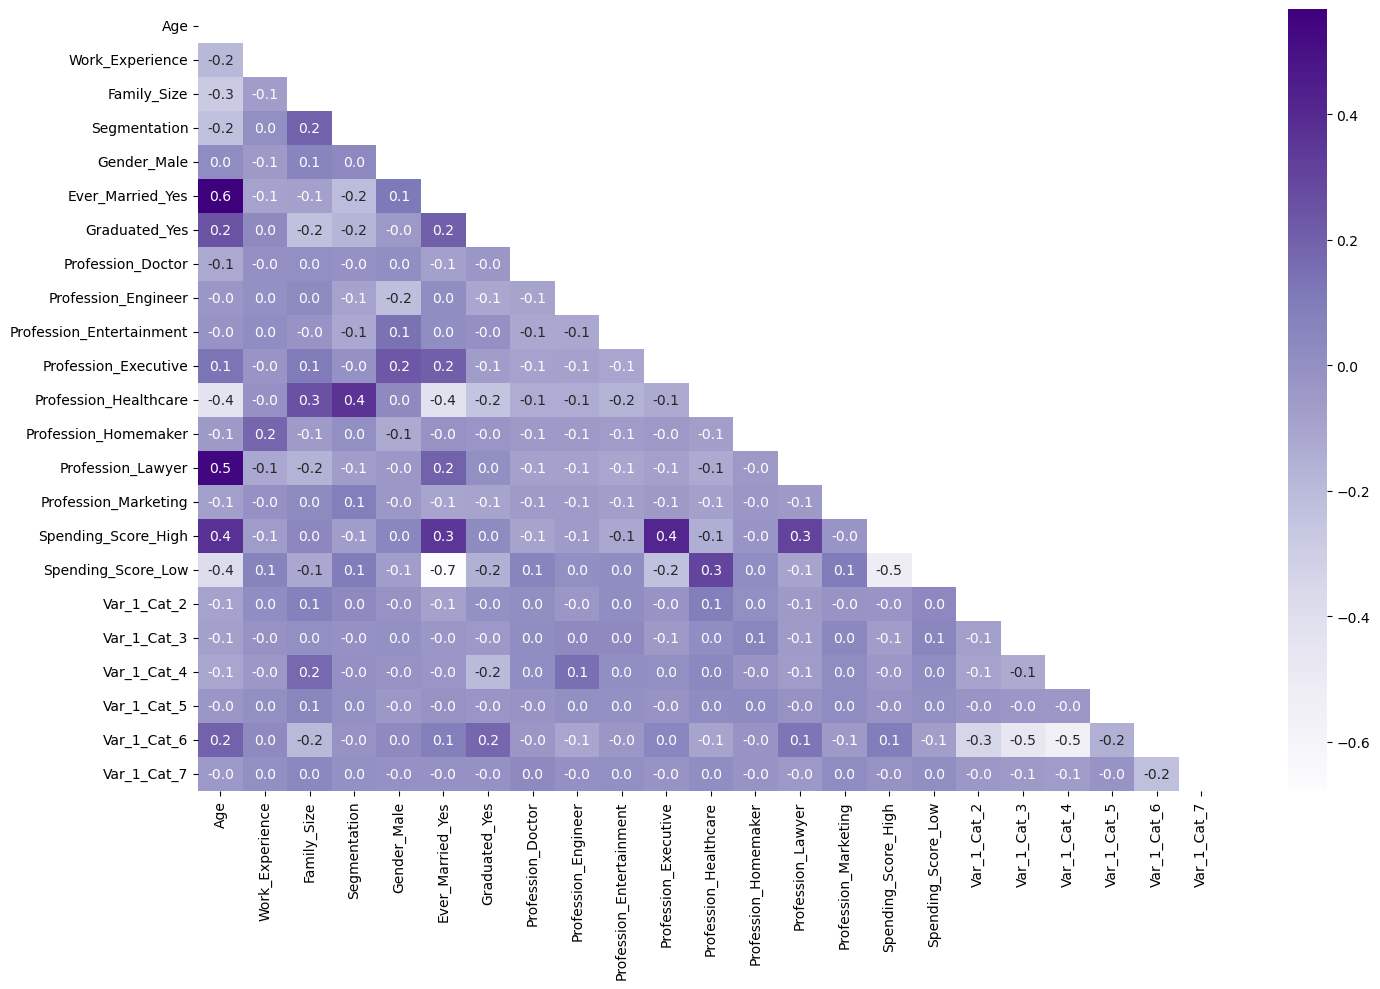

In [17]:
# correlation matrix
correlation = df_encoded.corr()
correlation

# sns heatmap
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, fmt = ".1f", cmap = "Purples", mask =np.triu(np.ones_like(correlation, dtype=bool)))
plt.tight_layout()
plt.show()

### Step 4: Perform Analysis Using Unsupervised Learning Models of your Choice, Present Discussion, and Conclusions

### Models
I have chosen to do 2 unsupervised and 5 supervised models. Specifically, the unsupervised models I chose to try was AggCluster and DBSCAN. While the unsupervised models I chose were from the final I did in ML1 include Logistic Regression, KNN, Decision Tree, Random Forest, and Support Vector. I made the effort to ensure each of the models were hyperparameter tuned with their respective available hyperparameters by leveraging GridSearchCV. I decided not to treat for imbalance as I discovered the 4 segments were relatively balanced in the EDA step. For the unsupervised learning methods, I needed a way to get the models accuracy based on ground truth labels. I wanted to explore an alternative method to permutations. I found an interesting method online and leveraged a piece of code (sourced below). The code leverages the scipy library to optimize mapping the discovered segments with the ground truth labels. Once that mapping was done, we can then measure the accuracy of each unsupervised model. This way, I am able to compare against the supervised learning methods I chosen.

### Unsupervised Models

In [18]:
df_encoded[df_encoded.select_dtypes(include=[bool]).columns] = df_encoded[df_encoded.select_dtypes(include=[bool]).columns].astype(int)
df_encoded

,Age,Work_Experience,Family_Size,Segmentation,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,4,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,67,1.0,1.0,2,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,67,0.0,2.0,2,1,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
5,56,0.0,2.0,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,32,1.0,3.0,3,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,41,0.0,5.0,2,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8064,35,3.0,4.0,4,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8065,33,1.0,1.0,4,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8066,27,1.0,4.0,2,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### Unsupervised Learning Set-up

In [20]:
# convert boolean to integer form for model
df_encoded[df_encoded.select_dtypes(include=[bool]).columns] = df_encoded[df_encoded.select_dtypes(include=[bool]).columns].astype(int)

# split training dataset 20% testing 80% training - note, for unsupervised learning I will drop the label column and
# train the model without the labels. We will then test for accuracy with labels
X = df_encoded.drop(columns=['Segmentation'])
y = df_encoded['Segmentation']  # True labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# similar code to how we approached scaling in past assignments / ML1 Final
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# source: https://docs.neurodata.io/notebooks/pedigo/graspologic/clustering/2020/10/12/remapping-labels.html
# helper function to help reassign labels produced by clustering algorithm to match ground truth labels - obtained helper code
# from source above
def reassign_labels(true_labels, pred_labels, return_map=False):
    # initialize confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)
    # source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
    # apply linear_sum_assignment for optimal label assignment
    row_idx, col_idx = linear_sum_assignment(cm,maximize=True)
    
    # iterate over true labels and create mapping
    mapping = {}
    for i in range(len(col_idx)):
        mapping[col_idx[i]] = row_idx[i]
    
    reassigned_labels = np.vectorize(mapping.get)(pred_labels)

    if return_map:
        return reassigned_labels, mapping
    else:
        return reassigned_labels

# helper function to assess accuracy of model for best fit based on hyperparameter tuning below
# using GridSearchCV
def acc_score(temp_model, X, y):
    pred_labels = temp_model.fit_predict(X)
    reassigned_labels = reassign_labels(pred_labels, y)
    return accuracy_score(y, reassigned_labels)

### Unsupervised Model 1: Agglomerative Cluster

In [21]:
# initialize parameters for AggCluster to cycle through leveraging GridSearchCV
# Initialize parameters for agg cluster fixing n_clusters at 4 and only using euclidean with 'ward' linkage
agg_params = {
    'n_clusters': [4],  # Fixed
    'linkage': ['ward', 'complete', 'average', 'single'],
    'metric': ['euclidean'],  # Only use 'euclidean' if 'ward' is included
}

# seperate euclidean and ward due to documentation stating ward can be used only with euclidean to add the other options
agg_params_2 = {
    'linkage': ['complete', 'average', 'single'],
    'metric': ['euclidean', 'manhattan'],
}

# combine both sets of parametrs below to ensure ward is only used with euclidean while iterating through other possiblities
agglomerative_params_combined = {
    'n_clusters': [4],
    'linkage': ['ward'] + agg_params_2['linkage'],
    'metric': ['euclidean'] + agg_params_2['metric'],
}


# initialize GridSearchCV and wrap it around the parameters initialized above with the
# helper acc score function
grid_search = GridSearchCV(
    AgglomerativeClustering(),
    param_grid=agg_params,
    scoring=acc_score,
    cv=5
)

# Fit the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Print results
print(f'Best AggCluster parameters: {best_params}')
print(f'Best AggCluster acc: {best_accuracy}')

Best AggCluster parameters: {'linkage': 'single', 'metric': 'euclidean', 'n_clusters': 4}
Best AggCluster acc: 0.3401546655506927


### Unsupervised Model 2: DBSCAN

In [22]:
# initialize parameters for AggCluster to cycle through leveraging GridSearchCV
# Initialize parameters for Agglomerative Clustering with fixed n_clusters
dbscan_params = {
    'eps': [0.3, 0.5, 0.7],  # Example values, adjust as necessary
    'min_samples': [5, 10, 15]
}

# initialize GridSearchCV and wrap it around the parameters initialized above with the
# helper acc score function
grid_search = GridSearchCV(
    DBSCAN(),
    param_grid=dbscan_params,
    scoring=acc_score,
    cv=5
)

# Fit the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Print results
print(f'Best DBSCAN parameters: {best_params}')
print(f'Best DBSCAN acc: {best_accuracy}')

Best DBSCAN parameters: {'eps': 0.3, 'min_samples': 10}
Best DBSCAN acc: 0.30117564105494704


### Supervised Models

In [25]:
# code taken from ML1 final I did and tweaked
# initiate dictionary to hold several sklearn models so we can automate training across all in a for loop
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector': SVC(probability=True),
}
# store model paramters for each model to leverage in GridSearchCV
parameters = {
    'Logistic Regression': {'C': [0.1, 0.5, 1, 5, 50]},
    'KNN': {'n_neighbors': [1, 3, 5, 7, 9]},
    'Decision Tree': {'max_depth': [None, 5, 10, 15, 20, 25, 30]},
    'Random Forest': {'n_estimators': [25, 50, 100, 200], 'max_depth': [None, 5, 10, 20]},
    'Support Vector': {'C': [0.1, 1, 50], 'kernel': ['linear', 'rbf', 'poly']},
}

# train each model included in the dictionary above, fit the model, 
# predict on test set, produce accuracy and classification report for each model trained via for loop
model_results = {}
# number of features
n_features = 8
for model, sk_model in models.items():    
    print(f"\nTraining model: {model}")
    grid = GridSearchCV(sk_model, parameters[model],cv=5,scoring='accuracy')
    grid.fit(X_train_scaled,y_train)
    # obtain best model from grid search implementation
    best_model = grid.best_estimator_
    print(f"{model} completed best with parameters: {grid.best_params_}")
    # isolate the models that have either a coef_ or feature_importances_ to apply 
    #recursive feature elimination (RFE) technique via sklearn to treat multi-collinearity
    if hasattr(best_model,"coef_") or hasattr(best_model,"feature_importances_"):
        # apply RFE to treat multi-collinearity
        rfe = RFE(estimator=best_model, n_features_to_select=n_features)
        rfe.fit(X_train_scaled, y_train)
        # only keep the selected features from RFE technique via sklearn
        X_train_rfe = rfe.transform(X_train_scaled)
        X_test_rfe = rfe.transform(X_test_scaled)
        # fit the model
        best_model.fit(X_train_rfe, y_train)
        # predict values
        y_hat = best_model.predict(X_test_rfe)
        # get probabilities based on prediction
        y_prob = best_model.predict_proba(X_test_rfe)[:,1]
        features = X.columns[rfe.support_].tolist()
    # if models don't have the coef_ or feature_importance_ proceed without treating for imbalance with SMOTE
    else:
        # fit best model
        best_model.fit(X_train_scaled, y_train)
        # predict values based on best model
        y_hat = best_model.predict(X_test_scaled)
        # get probabilities
        y_prob = best_model.predict_proba(X_test_scaled)[:,1]
        features = X.columns.tolist()
    # calculate accuracy
    acc = accuracy_score(y_test, y_hat)
    print(f"Accuracy for {model}: {acc:.4f}")
    # calculate clf
    clf_report = classification_report(y_test, y_hat)
    print(f"Completed clf report for {model}")
    # calculate cv and mean
    cv_scores = cross_val_score(sk_model, X_train_scaled, y_train, cv= 5)
    cv_mean = cv_scores.mean()
    print(f"Completed cv score for {model}: {cv_mean:.4f}")
    # store results in dictionary
    model_results[model] = {
    'model': best_model,
    'acc': acc,
    'clf': clf_report,
    'cv_mean': cv_mean,
    'features': features
    }
    print(f"Completed training model: {model}")

# sort model results by accuracy from most to least accurate
sorted_model_results = sorted(model_results.items(), key=lambda item: item[1]['cv_mean'], reverse=True)
print(f"Completed training model sorting models based on Cross Validation Mean score")


Training model: Logistic Regression
Logistic Regression completed best with parameters: {'C': 50}
Accuracy for Logistic Regression: 0.4951
Completed clf report for Logistic Regression
Completed cv score for Logistic Regression: 0.5148
Completed training model: Logistic Regression

Training model: KNN
KNN completed best with parameters: {'n_neighbors': 9}
Accuracy for KNN: 0.4944
Completed clf report for KNN
Completed cv score for KNN: 0.4717
Completed training model: KNN

Training model: Decision Tree
Decision Tree completed best with parameters: {'max_depth': 5}
Accuracy for Decision Tree: 0.4974
Completed clf report for Decision Tree
Completed cv score for Decision Tree: 0.4293
Completed training model: Decision Tree

Training model: Random Forest
Random Forest completed best with parameters: {'max_depth': 10, 'n_estimators': 200}
Accuracy for Random Forest: 0.4936
Completed clf report for Random Forest
Completed cv score for Random Forest: 0.4863
Completed training model: Random Fo

In [27]:
# now that we trained each model and added the results to model_results
# now we will extract the results and analyze to choose a single model to go with
width = 60
for model, result in sorted_model_results:
    print(f"\033[1m{model + ':' :^{width}}\033[0m")
    print(f"\n{'Cross Validation Mean Accuracy: ' + f'''{result['cv_mean']:.2f}''' :^{width}}")
    print(f"{result['clf']}\n")
    print(f"Selected features: {result['features']}\n")

                      Support Vector:                       

            Cross Validation Mean Accuracy: 0.53            
              precision    recall  f1-score   support

           1       0.40      0.46      0.43       315
           2       0.39      0.34      0.37       302
           3       0.58      0.52      0.55       346
           4       0.64      0.68      0.66       370

    accuracy                           0.51      1333
   macro avg       0.50      0.50      0.50      1333
weighted avg       0.51      0.51      0.51      1333


Selected features: ['Age', 'Work_Experience', 'Family_Size', 'Gender_Male', 'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_High', 'Spending_Score_Low', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7']

  

### Results and Analsyis

Based on the **summary of results** noted below, unsupervised learning with hyperparameter tuning with GridSearchCV I was able to get 0.34 accuracy for AggCluster model and 0.30 for DBSCAN. While not impressive, I tried running the data against supervised learning and was able to achieve a much higher accuracy rate of 0.51 for both Support Vector and Logistic Regression. In addition to accuracy measure, I have also reviewed the supervised learning model performance using precision, recall, f1-score, and cross validation mean. Each of the models were hyperparameter tuned to achieve the greatest accuracy before commiting to it. For example, with AggCluster, I tuned the model based on linkage and metric components. Likewise, I hyperparameter tuned the supervised learning methods as well. For example, for Logistic Regression I used 5 different C levels.

Before running the models, I made a hypothesis on which features I beleived would be more important in helping accurately cluster the data into specific segments. My hypothesis was that profession, spend, age, gender and marital status would be important features in detrmining customer segmentation. Based on supervised learning we can see that this is the case. Although, interestingly enough, the val_1 column seemed to play a role as well that I did not anticipate that it would.

**Several reasons why supervised learning methods performed better than unsupervised learning methods** include model complexity, the type of task, and cluster interpretability. In model complexity, supervised learning such as Logistic Regression and SVM are designed for linear and non-linear decision boundaries, respectively. Generally, they are more flexible for classification tasks compared to unsupervised learning. In addition, the type of task is curcial. Supervised learning models learn from labeled data and are typically more effective for prediction tasks if labels are available. While, unsupervised learning methods find patterns in data without labels. They solely rely on the data itself and features. Lastly, in terms of cluster interpretability, when using unsupervised learning, data is grouped based on similarity. The issue is the resulting clusters may not map well to the true underlying classes. As such, misalignment between predicted labels and ground true labels would intuitively lead to lower accuracy. 

|Model|Type|Accuracy|
|:-|:-|:-|
|AgglomerativeClustering|Unsupervised|0.34|
|DBSCAN|Unsupervised|0.30|
|Support Vector|Supervised|0.51|
|Logistic Regression|Supervised|0.51|
|Decision Tree|Supervised|0.50|
|Random Forest|Supervised|0.49|
|KNN|Supervised|0.47|

### Discussion and Conclusion

**Discussion of learning and takeaways:**
<br>
After exploring the data, applying cleaning techniques, and conducting EDA, I was excited to build both unsupervised and supervised models to compare the performance of each. Initially, I thought I would get 0.90+ accuracy as the data seemed quite straight forward. However, much to my surprise, I was struggling to get over 40% with unsupervised methods and over 60% with supervised techniques. One thing I was humbled with is the fact that, getting accuracy scores above 0.80 does not always happen and we have to be okay with that to some extent. For example, for this specific task, the goal was to segment customers so we can tailor marketing dollars towards the right segments. Going in with 30-50% accuracy is better than going in with a random guess.
<br>
Doing this project I was able to learn how to leverage `linear_sum_assignment` to map unsupervised learning results to ground truth labels so that I can then compare their accuracy. The reason I chose this route is so that I can make an apples to apples comparison with supervised learning methods. A common way to measure unsupervised learning performance is via silhouette scores. However, when comparing to supervised learning, we won't be able to cleanly compare the results.
<br><br>
**Discussion of why something didn't work:**
<br>
At first, I was struggling to get an appropriate way to measure the accuracy of unsupervised learning methods. My initial thought was to perform permutations against all choices and select the best performing. However, this was taking a longer time and I wanted to explore a more efficient method. This brought me to discover `scipy.optimize` function which I leveraged a block of code from neurodata.io sourced below. This allowed me to move forward and create an apples to apples comparison to supervised learning methods.
<br><br>
**Suggested ways to improve:**
<br>
Some suggested ways to improve the models would be to remove outliers from the dataset and check to see if the performance improves. Additioanlly, to label encode the data rather than the `get.dummies` route I chose. Another idea would be to see if we can feature engineer some of the data. For example, high spending and married folks. To see if that improves the performance of both unsupervised and supervised models. Lastly, I would be interested to explore what the accuracy would look like if we removed a number of rows containing the *Artist* occupation to make the proffession data points more balanced.
<br><br>

### Step 5: Produce Deliverables: High Quality, Organized Jupyter Notebook Report, Video presentation, and GitHub Repository

GitHub repository link: https://github.com/Ofleitman/ML2_Final

The video presentation is uploaded directly in the assignment

### References:
https://docs.neurodata.io/notebooks/pedigo/graspologic/clustering/2020/10/12/remapping-labels.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
https://www.kaggle.com/datasets/vetrirah/customer/data
https://www.analyticsvidhya.com/datahack/contest/janatahack-customer-segmentation/#ProblemStatement
https://numpy.org/doc/stable/
https://pandas.pydata.org/pandas-docs/stable/
https://seaborn.pydata.org/
https://scikit-learn.org/stable/
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
https://scikit-learn.org/stable/modules/generated/sklearn.base.clone.html
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
https://scikit-learn.org/stable/modules/model_evaluation.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
https://imbalanced-learn.org/stable/
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
https://matplotlib.org/stable/contents.html
https://cran.r-project.org/web/packages/summarytools/summarytools.pdf
https://docs.scipy.org/doc/scipy/
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html